<a href="https://colab.research.google.com/github/Anujpratap9997/DeepLearning/blob/main/ANN_for_speed_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Here I have use the Random generate data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [61]:
df = pd.read_csv("/content/drive/MyDrive/Final Year Project/Speed control of DC Motor/Datasets/motor_data.csv")

In [62]:
df.head()

,RPM,TerminalVoltage,PWM
0,1324,12.59,255
1,1309,12.39,250
2,1285,12.08,245
3,1264,11.84,240
4,1256,11.79,235


In [43]:
#X = df.drop(columns=['PWM_value', 'Terminal_voltage'])  # Exclude target columns
#y = df[['PWM_value', 'Terminal_voltage']]

In [63]:
X = df.drop(columns=['PWM', 'TerminalVoltage'])  # Exclude target columns
y = df[['PWM', 'TerminalVoltage']]

In [64]:
X.sample(10)

,RPM
10,1205
0,1324
3,1264
6,1211
30,855
43,292
5,1240
33,742
34,707
40,444


In [65]:
y.sample(10)

,PWM,TerminalVoltage
16,175,10.70
15,180,10.79
33,90,7.16
3,240,11.84
11,200,11.23
39,60,4.85
8,215,11.49
37,70,5.66
32,95,7.49
35,80,6.47


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    #Dropout(0.2),  # Dropout layer with 20% dropout rate
    Dense(64, activation='relu'),
    #Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2)  # 2 output nodes for PWM value and Terminal voltage
])
model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), loss='mean_squared_error', metrics=['accuracy'])  # Specify 'accuracy' metric

In [87]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
2/2 [==============================] - 1s 170ms/step - loss: 28216.8203 - accuracy: 0.1111 - val_loss: 10282.2021 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 12522.5645 - accuracy: 1.0000 - val_loss: 3654.5107 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 4290.8555 - accuracy: 1.0000 - val_loss: 1146.2700 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 1340.7059 - accuracy: 1.0000 - val_loss: 408.6828 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 29ms/step - loss: 485.7838 - accuracy: 1.0000 - val_loss: 389.1846 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 460.2638 - accuracy: 1.0000 - val_loss: 595.6588 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 721.2023 - accuracy: 1.0000 - val_loss: 721.4119 - val_accur

In [69]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
#print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 23ms/step - loss: 566.8914 - accuracy: 1.0000
Test Loss: [566.891357421875, 1.0]


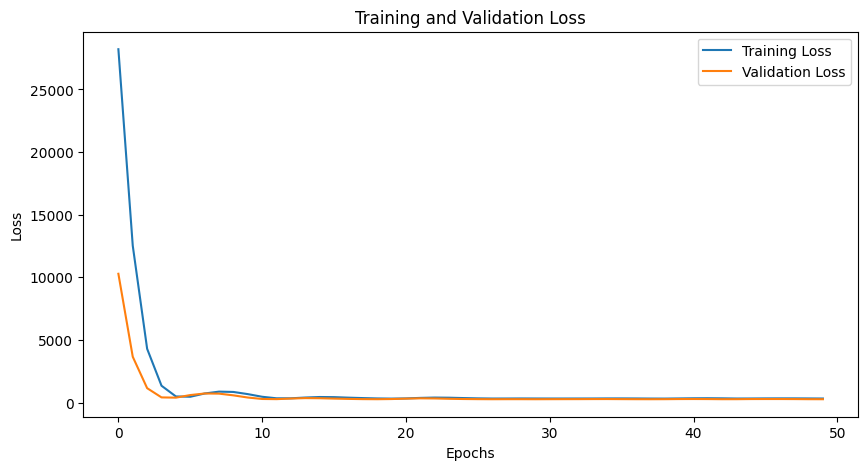

In [88]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

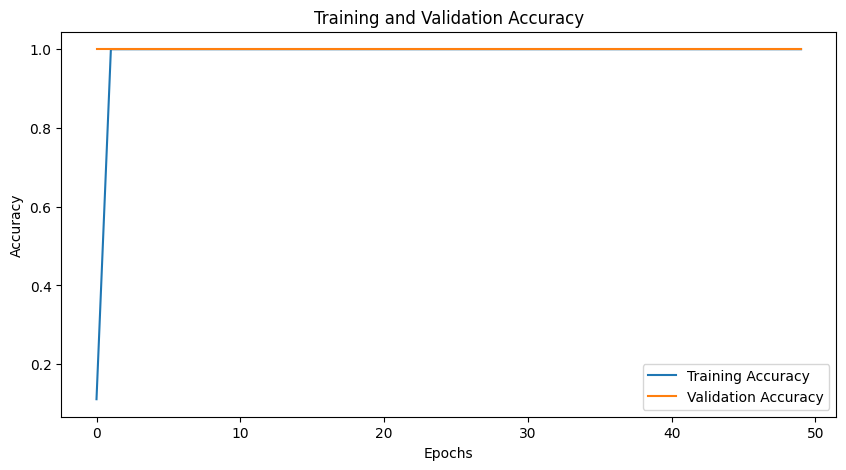

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [90]:
def predict_values(speed):
    # Create a numpy array with the speed value
    speed_array = np.array([[speed]])

    # Use the model to predict PWM and Terminal Voltage values
    predictions = model.predict(speed_array)

    # Extract PWM and Terminal Voltage predictions
    pwm_value = predictions[0][0]
    terminal_voltage = predictions[0][1]

    return pwm_value, terminal_voltage

# Example usage:
speed_input = 900  # RPM value
predicted_pwm, predicted_voltage = predict_values(speed_input)
print(f"Predicted PWM Value: {predicted_pwm}")
print(f"Predicted Terminal Voltage: {predicted_voltage}")

1/1 [==============================] - 0s 53ms/step
Predicted PWM Value: 141.598876953125
Predicted Terminal Voltage: 8.603869438171387
